# Wheel Strategy Backtest

The **Wheel Strategy** is an income-generating options strategy that involves:

1. **Selling Cash-Secured Puts**: When you don't own the stock, sell OTM puts to collect premium. If assigned, you acquire stock at a discount.
2. **Selling Covered Calls**: Once you own the stock (from assignment or direct purchase), sell OTM calls to collect premium. If assigned, you sell the stock at a profit.
3. **Rinse and Repeat**: When the stock is called away, start selling puts again.

This strategy works best in neutral to slightly bullish markets and generates consistent income from option premiums.

In [1]:
import pandas as pd
import sys
sys.path.insert(0, "../..")
from utils.simulation import BacktestSimulation, TradingAction
from strategies.wheel_strategy import create_wheel_strategy, create_aggressive_wheel_strategy, create_conservative_wheel_strategy
from datetime import datetime, timedelta

# Configuration
ticker = "MSTR"
put_strike_factor = 0.95  # Sell puts 5% below current price
call_strike_factor = 1.05  # Sell calls 5% above current price
days_to_expiration = 30
interest_rate = 0.05

tickers = [ticker]
start = datetime(2024, 1, 1)
end = datetime(2024, 12, 31)
initial_cash = 100000

## Standard Wheel Strategy

Using moderate strikes: 5% OTM puts and 5% OTM calls with 30-day expiration.

Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/wheel/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

WHEEL STRATEGY PERFORMANCE

=== Performance Summary ===
Initial Value: $100,000.00
Final Value: $129,877.65
Total Return: 29.88%
Sharpe Ratio: 0.87
Max Drawdown: 25.01%
Annualized Volatility: 39.63%

Total transactions: 28

Transaction History:
         date          action ticker  contracts      strike  premium_per_share  total_premium expiration  current_price  shares_bought  shares       price          total  shares_sold
0  2024-01-02        SELL_PUT   MSTR       15.0   65.089249           3.317336    4976.003508 2024-02-01            NaN            NaN     NaN         NaN            NaN          NaN
1  2024-02-01   PUT_EXERCISED   MSTR       15.0   65.089249                NaN            NaN        NaT      50.348000         1500.0     NaN         NaN            NaN          NaN
2  2024-02-01       BUY_STOCK   MSTR        NaN         NaN                NaN            NaN        NaT            NaN            N

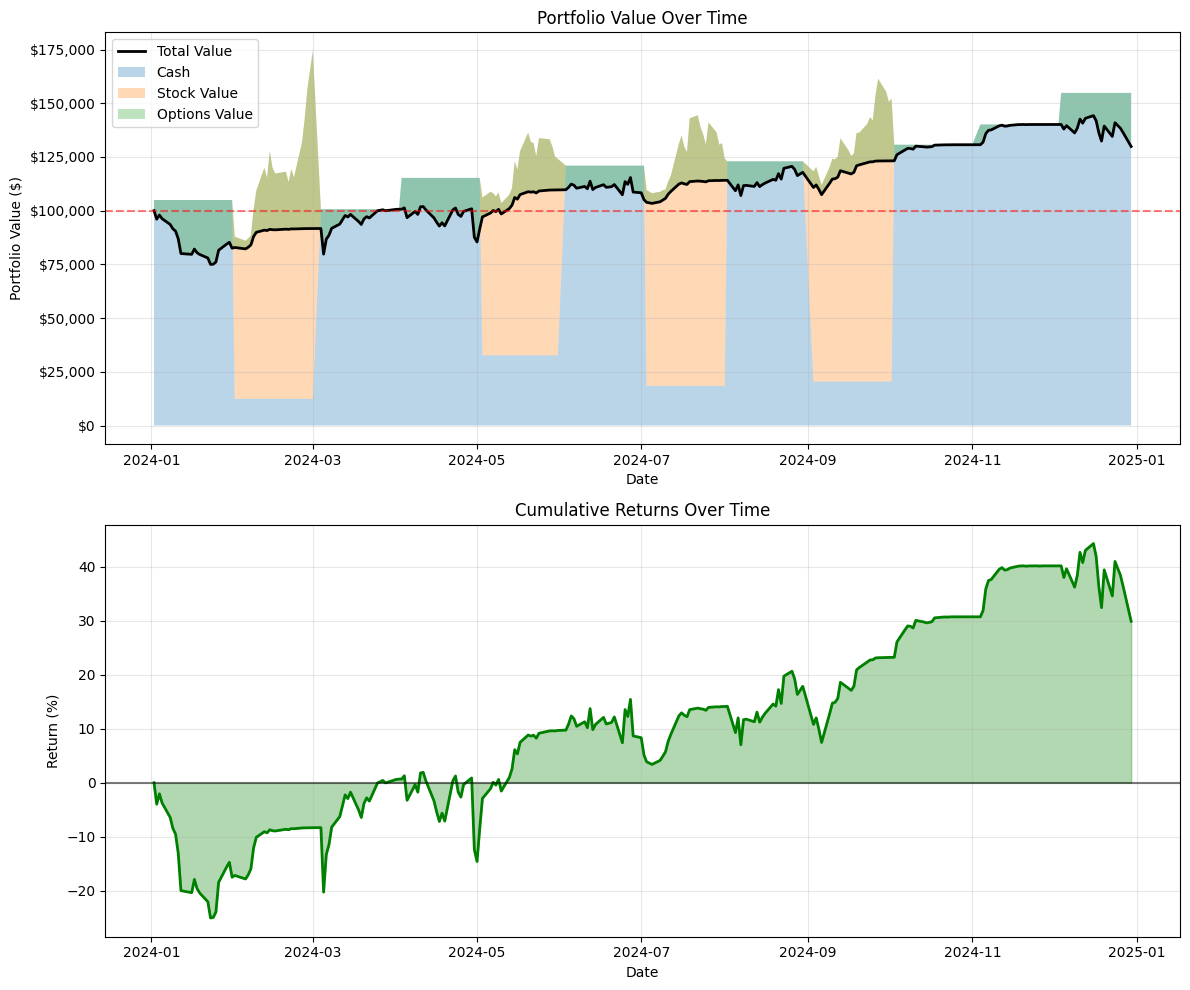

In [2]:
# Create and run standard wheel strategy
wheel_strategy = create_wheel_strategy(
    ticker=ticker,
    put_strike_factor=put_strike_factor,
    call_strike_factor=call_strike_factor,
    days_to_expiration=days_to_expiration,
    interest_rate=interest_rate
)

sim_wheel = BacktestSimulation(
    tickers=tickers,
    start_date=start,
    end_date=end,
    initial_cash=initial_cash,
    strategy_callback=wheel_strategy
)

results_wheel = sim_wheel.run()

print("\n" + "="*50)
print("WHEEL STRATEGY PERFORMANCE")
print("="*50)
sim_wheel.print_performance_stats()

transactions_wheel = sim_wheel.get_transactions()
print(f"\nTotal transactions: {len(transactions_wheel)}")
print("\nTransaction History:")
print(transactions_wheel.to_string())

sim_wheel.plot_portfolio_history()

## Aggressive Wheel Strategy

Using closer strikes: 2% OTM puts and 2% OTM calls with 14-day expiration for more frequent trades and higher income potential.

Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

AGGRESSIVE WHEEL STRATEGY PERFORMANCE

=== Performance Summary ===
Initial Value: $100,000.00
Final Value: $145,329.69
Total Return: 45.33%
Sharpe Ratio: 1.10
Max Drawdown: 24.30%
Annualized Volatility: 42.22%

Total transactions: 50


/Users/ryan/Desktop/quantitative-trading-models/strategies/wheel/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


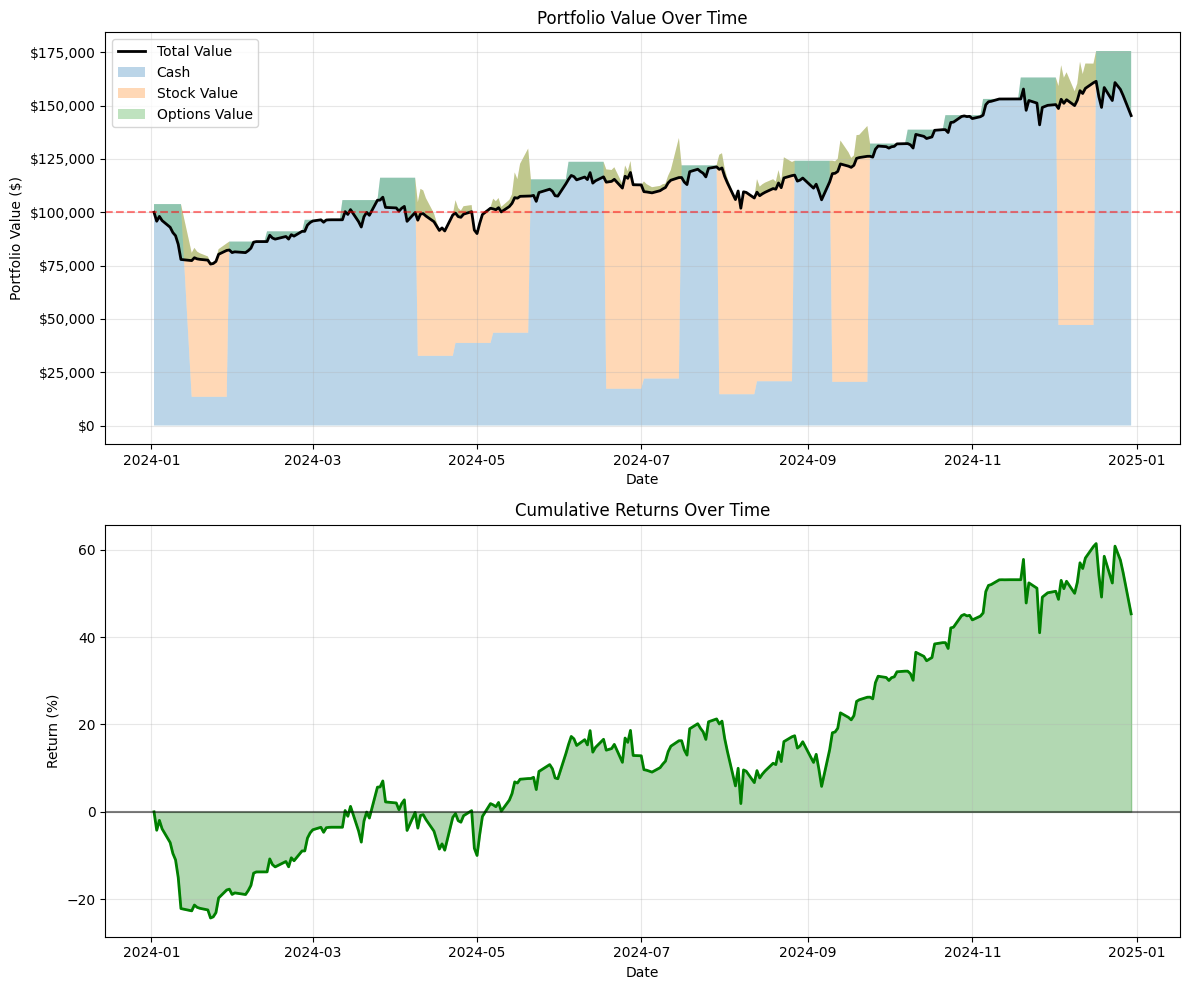

In [3]:
# Create and run aggressive wheel strategy
aggressive_wheel = create_aggressive_wheel_strategy(ticker=ticker, interest_rate=interest_rate)

sim_aggressive = BacktestSimulation(
    tickers=tickers,
    start_date=start,
    end_date=end,
    initial_cash=initial_cash,
    strategy_callback=aggressive_wheel
)

results_aggressive = sim_aggressive.run()

print("\n" + "="*50)
print("AGGRESSIVE WHEEL STRATEGY PERFORMANCE")
print("="*50)
sim_aggressive.print_performance_stats()

transactions_aggressive = sim_aggressive.get_transactions()
print(f"\nTotal transactions: {len(transactions_aggressive)}")

sim_aggressive.plot_portfolio_history()

## Conservative Wheel Strategy

Using further OTM strikes: 10% OTM puts and 10% OTM calls with 45-day expiration for lower assignment risk.

Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

CONSERVATIVE WHEEL STRATEGY PERFORMANCE

=== Performance Summary ===
Initial Value: $100,000.00
Final Value: $185,373.73
Total Return: 85.37%
Sharpe Ratio: 1.92
Max Drawdown: 21.94%
Annualized Volatility: 35.82%

Total transactions: 13


/Users/ryan/Desktop/quantitative-trading-models/strategies/wheel/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


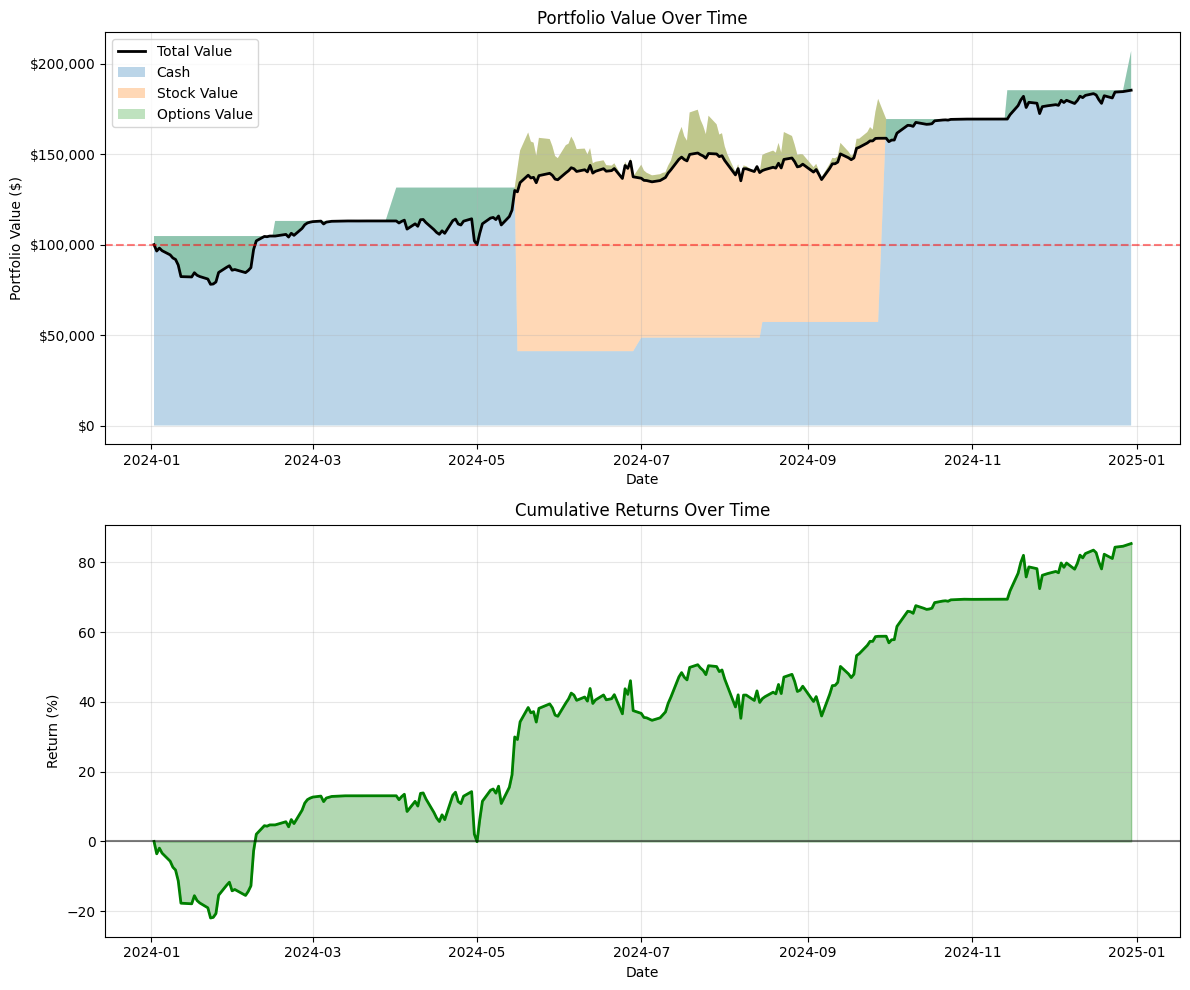

In [4]:
# Create and run conservative wheel strategy
conservative_wheel = create_conservative_wheel_strategy(ticker=ticker, interest_rate=interest_rate)

sim_conservative = BacktestSimulation(
    tickers=tickers,
    start_date=start,
    end_date=end,
    initial_cash=initial_cash,
    strategy_callback=conservative_wheel
)

results_conservative = sim_conservative.run()

print("\n" + "="*50)
print("CONSERVATIVE WHEEL STRATEGY PERFORMANCE")
print("="*50)
sim_conservative.print_performance_stats()

transactions_conservative = sim_conservative.get_transactions()
print(f"\nTotal transactions: {len(transactions_conservative)}")

sim_conservative.plot_portfolio_history()

## Buy and Hold Comparison

Let's compare the wheel strategies against a simple buy-and-hold strategy.

Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

BUY AND HOLD STRATEGY PERFORMANCE

=== Performance Summary ===
Initial Value: $100,000.00
Final Value: $442,055.24
Total Return: 342.06%
Sharpe Ratio: 1.90
Max Drawdown: 46.41%
Annualized Volatility: 110.30%

Total transactions: 1


/Users/ryan/Desktop/quantitative-trading-models/strategies/wheel/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


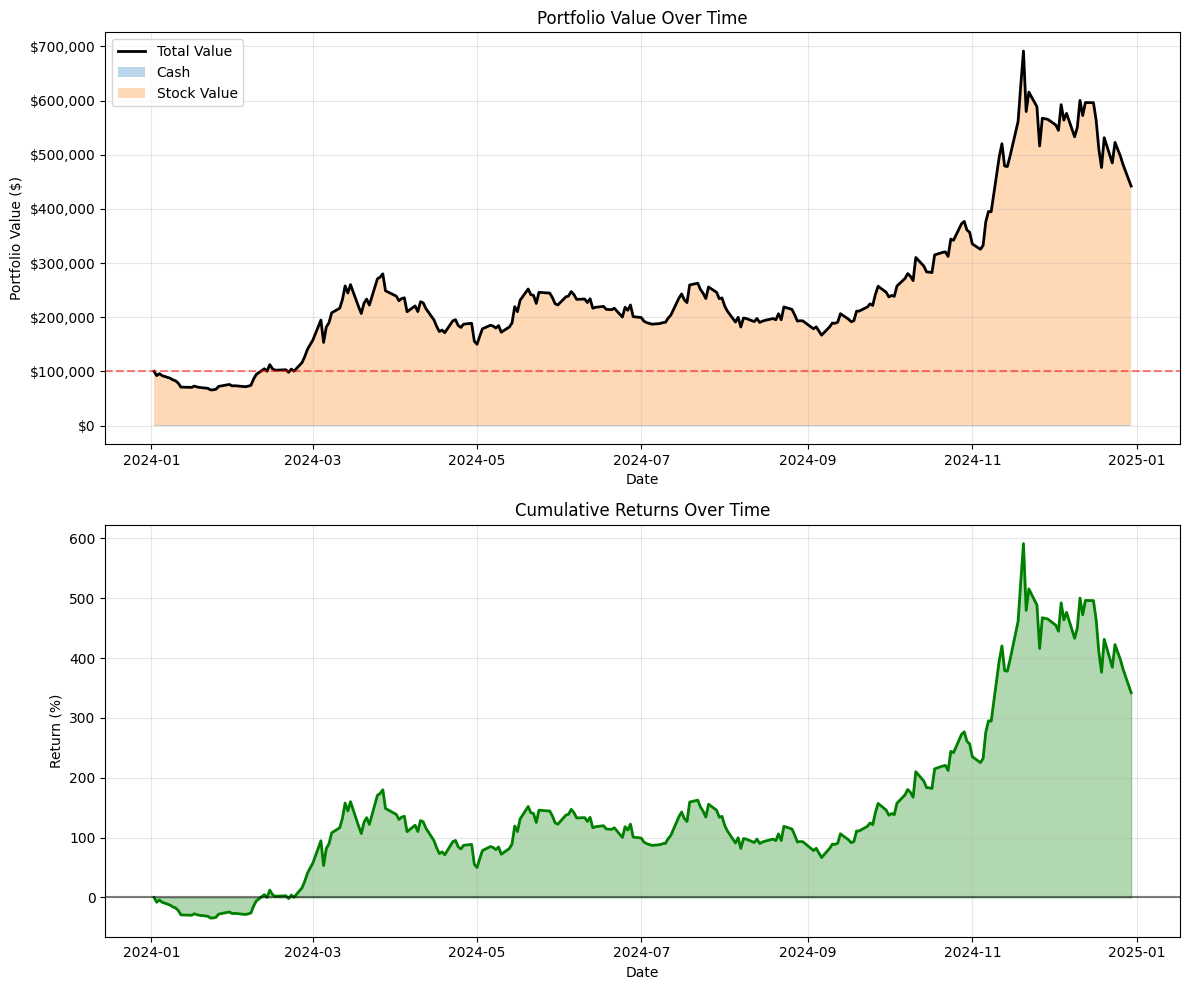

In [5]:
# Compare with Buy and Hold strategy
def buy_and_hold(date, portfolio, market_data, actions):
    """Simple buy and hold strategy for comparison"""
    current_price = market_data['prices'][ticker]
    
    # Buy stock with all available cash on first day
    if ticker not in portfolio.positions or portfolio.positions[ticker].shares == 0:
        max_shares = int(portfolio.cash / current_price)
        if max_shares > 0:
            actions.buy_stock(portfolio, ticker, max_shares, current_price)

# Run buy and hold simulation
sim_bh = BacktestSimulation(
    tickers=tickers,
    start_date=start,
    end_date=end,
    initial_cash=initial_cash,
    strategy_callback=buy_and_hold
)

results_bh = sim_bh.run()

print("\n" + "="*50)
print("BUY AND HOLD STRATEGY PERFORMANCE")
print("="*50)
sim_bh.print_performance_stats()

transactions_bh = sim_bh.get_transactions()
print(f"\nTotal transactions: {len(transactions_bh)}")

sim_bh.plot_portfolio_history()

## Strategy Comparison Summary

Compare all strategies side by side.

In [6]:
# Create comparison dataframe
import matplotlib.pyplot as plt

comparison_data = {
    'Strategy': ['Standard Wheel', 'Aggressive Wheel', 'Conservative Wheel', 'Buy & Hold'],
    'Final Value': [
        results_wheel['portfolio_value'].iloc[-1],
        results_aggressive['portfolio_value'].iloc[-1],
        results_conservative['portfolio_value'].iloc[-1],
        results_bh['portfolio_value'].iloc[-1]
    ],
    'Total Return (%)': [
        ((results_wheel['portfolio_value'].iloc[-1] / initial_cash) - 1) * 100,
        ((results_aggressive['portfolio_value'].iloc[-1] / initial_cash) - 1) * 100,
        ((results_conservative['portfolio_value'].iloc[-1] / initial_cash) - 1) * 100,
        ((results_bh['portfolio_value'].iloc[-1] / initial_cash) - 1) * 100
    ],
    'Transactions': [
        len(transactions_wheel),
        len(transactions_aggressive),
        len(transactions_conservative),
        len(transactions_bh)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*60)
print("STRATEGY COMPARISON")
print("="*60)
print(comparison_df.to_string(index=False))

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot portfolio values over time
axes[0].plot(results_wheel.index, results_wheel['portfolio_value'], label='Standard Wheel', linewidth=2)
axes[0].plot(results_aggressive.index, results_aggressive['portfolio_value'], label='Aggressive Wheel', linewidth=2)
axes[0].plot(results_conservative.index, results_conservative['portfolio_value'], label='Conservative Wheel', linewidth=2)
axes[0].plot(results_bh.index, results_bh['portfolio_value'], label='Buy & Hold', linewidth=2, linestyle='--')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Portfolio Value ($)')
axes[0].set_title('Portfolio Value Over Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot final returns
strategies = comparison_df['Strategy']
returns = comparison_df['Total Return (%)']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
axes[1].bar(strategies, returns, color=colors)
axes[1].set_ylabel('Total Return (%)')
axes[1].set_title('Final Returns Comparison')
axes[1].grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

KeyError: 'portfolio_value'

## Transaction Analysis

Let's analyze the types of transactions for the standard wheel strategy.


TRANSACTION BREAKDOWN (Standard Wheel)
action
SELL_PUT          8
PUT_EXERCISED     4
BUY_STOCK         4
SELL_CALL         4
CALL_EXERCISED    4
SELL_STOCK        4
Name: count, dtype: int64

Total Put Premiums Collected: $80,200.40
Total Call Premiums Collected: $27,273.96
Total Option Premiums: $107,474.36


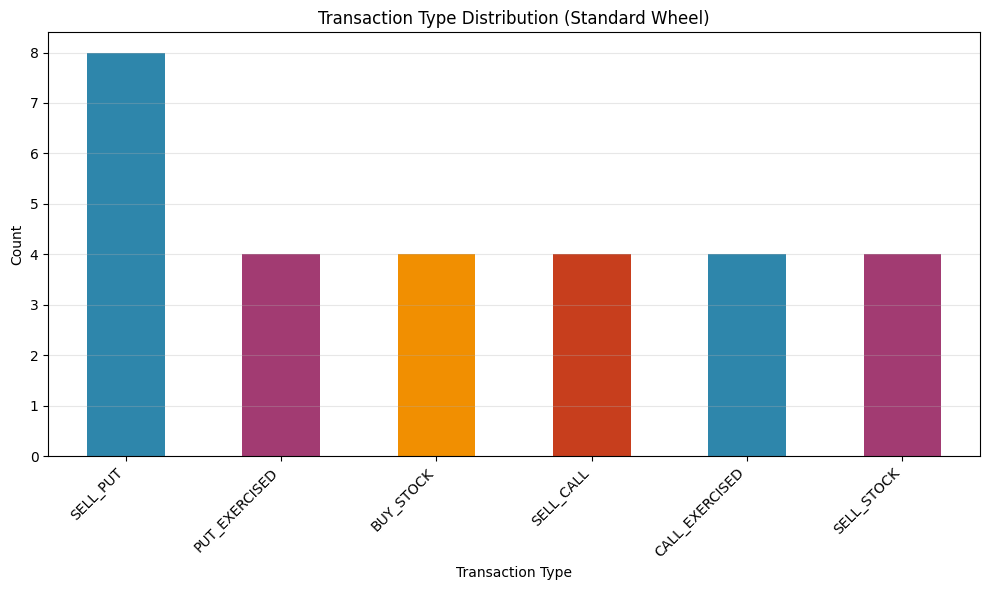

In [7]:
# Analyze transaction types for standard wheel
if len(transactions_wheel) > 0:
    action_counts = transactions_wheel['action'].value_counts()
    
    print("\n" + "="*50)
    print("TRANSACTION BREAKDOWN (Standard Wheel)")
    print("="*50)
    print(action_counts)
    
    # Calculate total premiums collected
    put_premiums = transactions_wheel[transactions_wheel['action'] == 'SELL_PUT']['total_premium'].sum() if 'SELL_PUT' in action_counts else 0
    call_premiums = transactions_wheel[transactions_wheel['action'] == 'SELL_CALL']['total_premium'].sum() if 'SELL_CALL' in action_counts else 0
    
    print(f"\nTotal Put Premiums Collected: ${put_premiums:,.2f}")
    print(f"Total Call Premiums Collected: ${call_premiums:,.2f}")
    print(f"Total Option Premiums: ${put_premiums + call_premiums:,.2f}")
    
    # Plot transaction breakdown
    fig, ax = plt.subplots(figsize=(10, 6))
    action_counts.plot(kind='bar', ax=ax, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])
    ax.set_xlabel('Transaction Type')
    ax.set_ylabel('Count')
    ax.set_title('Transaction Type Distribution (Standard Wheel)')
    ax.grid(True, alpha=0.3, axis='y')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No transactions recorded for standard wheel strategy.")